# Summarizing Retail Data - Grouping and aggregating data

For this module, we will be exploring the techniques for grouping and aggregating data. You will learn about:

* Speeding up data loading with Feather
* Grouping data using pandas library
* Plotting Aggregations
* Limiting Groups
* Aggregating data using built-in functions
* Manipulating Plot

## Load Data

In [1]:
# https://archive.ics.uci.edu/ml/datasets/online+retail
import pandas as pd
import polars as pl

In [2]:
sales = pd.read_excel('data/Online Retail.xlsx',
                     dtype_backend='pyarrow')

In [3]:
sales_pl = pl.read_excel(
    "data/Online Retail.xlsx",
    schema_overrides={"InvoiceNo":pl.Utf8}
)

In [4]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
sales_pl.head()

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
str,str,str,i64,str,f64,i64,str
"""536365""","""85123A""","""WHITE HANGING …",6,"""12/01/10 08:26…",2.55,17850,"""United Kingdom…"
"""536365""","""71053""","""WHITE METAL LA…",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"
"""536365""","""84406B""","""CREAM CUPID HE…",8,"""12/01/10 08:26…",2.75,17850,"""United Kingdom…"
"""536365""","""84029G""","""KNITTED UNION …",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"
"""536365""","""84029E""","""RED WOOLLY HOT…",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"


In [6]:
sales.shape

(541909, 8)

In [7]:
sales_pl.shape

(541909, 8)

In [8]:
sales_pl = sales_pl.with_columns(
    InvoiceDate=pl.col("InvoiceDate").str.to_datetime("%m/%d/%y %H:%M", strict=True, ambiguous="latest")
)

## Using Feather to speed up Loading

In [9]:
(sales
 .astype({'InvoiceNo': 'str', 'StockCode': 'str',
         'Description': 'str'})
 .to_feather('data/Online Retail.fth')
)

In [10]:
%%time 
pd.read_feather('data/Online Retail.fth',
                         dtype_backend='pyarrow')

CPU times: total: 15.6 ms
Wall time: 41.8 ms


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [11]:
%%time
pd.read_excel('data/Online Retail.xlsx',
                      dtype_backend='pyarrow')

CPU times: total: 34.8 s
Wall time: 35.9 s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [12]:
%%time
pl.read_excel(
    "data/Online Retail.xlsx",
    schema_overrides={"InvoiceNo":pl.Utf8}
)

CPU times: total: 32.5 s
Wall time: 33.1 s


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
str,str,str,i64,str,f64,i64,str
"""536365""","""85123A""","""WHITE HANGING …",6,"""12/01/10 08:26…",2.55,17850,"""United Kingdom…"
"""536365""","""71053""","""WHITE METAL LA…",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"
"""536365""","""84406B""","""CREAM CUPID HE…",8,"""12/01/10 08:26…",2.75,17850,"""United Kingdom…"
"""536365""","""84029G""","""KNITTED UNION …",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"
"""536365""","""84029E""","""RED WOOLLY HOT…",6,"""12/01/10 08:26…",3.39,17850,"""United Kingdom…"
"""536365""","""22752""","""SET 7 BABUSHKA…",2,"""12/01/10 08:26…",7.65,17850,"""United Kingdom…"
"""536365""","""21730""","""GLASS STAR FRO…",6,"""12/01/10 08:26…",4.25,17850,"""United Kingdom…"
"""536366""","""22633""","""HAND WARMER UN…",6,"""12/01/10 08:28…",1.85,17850,"""United Kingdom…"
"""536366""","""22632""","""HAND WARMER RE…",6,"""12/01/10 08:28…",1.85,17850,"""United Kingdom…"


## EDA

In [13]:
sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [14]:
(sales_pl
 .select(pl.col(pl.Float64, pl.Int64, pl.Datetime))
 .describe()
)

describe,Quantity,InvoiceDate,UnitPrice,CustomerID
str,f64,str,f64,f64
"""count""",541909.0,"""541909""",541909.0,406829.0
"""null_count""",0.0,"""0""",0.0,135080.0
"""mean""",9.55225,null,4.611114,15287.69057
"""std""",218.081158,null,96.759853,1713.600303
"""min""",-80995.0,"""2010-12-01 01:…",-11062.06,12346.0
"""25%""",1.0,null,1.25,13953.0
"""50%""",3.0,null,2.08,15152.0
"""75%""",10.0,null,4.13,16791.0
"""max""",80995.0,"""2011-12-09 12:…",38970.0,18287.0


<Axes: >

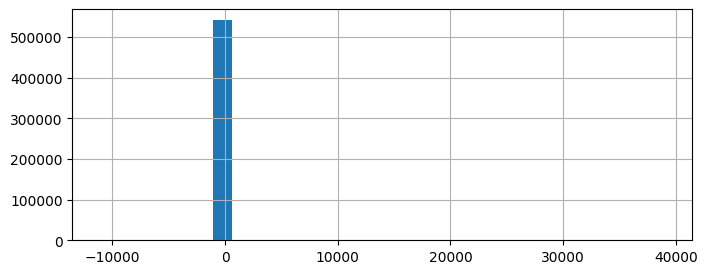

In [15]:
sales.UnitPrice.hist(figsize=(8,3), bins=30)

In [16]:
(sales_pl
 ["UnitPrice"]
 .plot
 .hist(bins=30,
       width=800,
       height=300)
)

:Histogram   [UnitPrice]   (UnitPrice_count)

In [17]:
(sales
 .query('UnitPrice < 0')
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


In [18]:
(sales_pl
 .filter(pl.col("UnitPrice") < 0)
 )

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
str,str,str,i64,datetime[μs],f64,i64,str
"""A563186""","""B""","""Adjust bad deb…",1,2011-08-12 02:51:00,-11062.06,null,"""United Kingdom…"
"""A563187""","""B""","""Adjust bad deb…",1,2011-08-12 02:52:00,-11062.06,null,"""United Kingdom…"


In [19]:
(sales
 .query('Quantity < 0')
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [20]:
(sales_pl
 .filter(pl.col("Quantity") < 0)
 )

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
str,str,str,i64,datetime[μs],f64,i64,str
"""C536379""","""D""","""Discount""",-1,2010-12-01 09:41:00,27.5,14527,"""United Kingdom…"
"""C536383""","""35004C""","""SET OF 3 COLOU…",-1,2010-12-01 09:49:00,4.65,15311,"""United Kingdom…"
"""C536391""","""22556""","""PLASTERS IN TI…",-12,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"
"""C536391""","""21984""","""PACK OF 12 PIN…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21983""","""PACK OF 12 BLU…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21980""","""PACK OF 12 RED…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21484""","""CHICK GREY HOT…",-12,2010-12-01 10:24:00,3.45,17548,"""United Kingdom…"
"""C536391""","""22557""","""PLASTERS IN TI…",-12,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"
"""C536391""","""22553""","""PLASTERS IN TI…",-24,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"


In [21]:
(sales
 .query('CustomerID == 17548')
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548,United Kingdom


In [22]:
(sales_pl
 .filter(pl.col("CustomerID") == 17548)
 )

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
str,str,str,i64,datetime[μs],f64,i64,str
"""C536391""","""22556""","""PLASTERS IN TI…",-12,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"
"""C536391""","""21984""","""PACK OF 12 PIN…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21983""","""PACK OF 12 BLU…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21980""","""PACK OF 12 RED…",-24,2010-12-01 10:24:00,0.29,17548,"""United Kingdom…"
"""C536391""","""21484""","""CHICK GREY HOT…",-12,2010-12-01 10:24:00,3.45,17548,"""United Kingdom…"
"""C536391""","""22557""","""PLASTERS IN TI…",-12,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"
"""C536391""","""22553""","""PLASTERS IN TI…",-24,2010-12-01 10:24:00,1.65,17548,"""United Kingdom…"
"""550755""","""22585""","""PACK OF 6 BIRD…",24,2011-04-20 12:01:00,1.25,17548,"""United Kingdom…"
"""550755""","""22082""","""RIBBON REEL ST…",10,2011-04-20 12:01:00,1.65,17548,"""United Kingdom…"


In [23]:
sales.select_dtypes('string')

,InvoiceNo,StockCode,Description,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,France


In [24]:
sales_pl.select(pl.col(pl.Utf8))

InvoiceNo,StockCode,Description,Country
str,str,str,str
"""536365""","""85123A""","""WHITE HANGING …","""United Kingdom…"
"""536365""","""71053""","""WHITE METAL LA…","""United Kingdom…"
"""536365""","""84406B""","""CREAM CUPID HE…","""United Kingdom…"
"""536365""","""84029G""","""KNITTED UNION …","""United Kingdom…"
"""536365""","""84029E""","""RED WOOLLY HOT…","""United Kingdom…"
"""536365""","""22752""","""SET 7 BABUSHKA…","""United Kingdom…"
"""536365""","""21730""","""GLASS STAR FRO…","""United Kingdom…"
"""536366""","""22633""","""HAND WARMER UN…","""United Kingdom…"
"""536366""","""22632""","""HAND WARMER RE…","""United Kingdom…"


In [25]:
sales.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [26]:
sales_pl["Country"].value_counts(sort=True)

Country,count
str,u32
"""United Kingdom…",495478
"""Germany""",9495
"""France""",8557
"""EIRE""",8196
"""Spain""",2533
"""Netherlands""",2371
"""Belgium""",2069
"""Switzerland""",2002
"""Portugal""",1519


In [27]:
sales.StockCode.value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
23609        1
85179a       1
23617        1
90214U       1
47591b       1
Name: count, Length: 4070, dtype: int64[pyarrow]

In [28]:
sales_pl["StockCode"].value_counts(sort=True)

StockCode,count
str,u32
"""85123A""",2313
"""22423""",2203
"""85099B""",2159
"""47566""",1727
"""20725""",1639
"""84879""",1502
"""22720""",1477
"""22197""",1476
"""21212""",1385


## Sales by Year

In [29]:
(sales
 .assign(total=sales.Quantity * sales.UnitPrice)
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [30]:
(sales_pl
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice")     
 )
)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
str,str,str,i64,datetime[μs],f64,i64,str,f64
"""536365""","""85123A""","""WHITE HANGING …",6,2010-12-01 08:26:00,2.55,17850,"""United Kingdom…",15.3
"""536365""","""71053""","""WHITE METAL LA…",6,2010-12-01 08:26:00,3.39,17850,"""United Kingdom…",20.34
"""536365""","""84406B""","""CREAM CUPID HE…",8,2010-12-01 08:26:00,2.75,17850,"""United Kingdom…",22.0
"""536365""","""84029G""","""KNITTED UNION …",6,2010-12-01 08:26:00,3.39,17850,"""United Kingdom…",20.34
"""536365""","""84029E""","""RED WOOLLY HOT…",6,2010-12-01 08:26:00,3.39,17850,"""United Kingdom…",20.34
"""536365""","""22752""","""SET 7 BABUSHKA…",2,2010-12-01 08:26:00,7.65,17850,"""United Kingdom…",15.3
"""536365""","""21730""","""GLASS STAR FRO…",6,2010-12-01 08:26:00,4.25,17850,"""United Kingdom…",25.5
"""536366""","""22633""","""HAND WARMER UN…",6,2010-12-01 08:28:00,1.85,17850,"""United Kingdom…",11.1
"""536366""","""22632""","""HAND WARMER RE…",6,2010-12-01 08:28:00,1.85,17850,"""United Kingdom…",11.1


In [31]:
(sales
 .assign(total=sales.Quantity * sales.UnitPrice,
        year=sales.InvoiceDate.dt.year)
 .groupby('year')
 .sum(numeric_only=True)
)

,Quantity,UnitPrice,CustomerID,total
year,,,,
2010,342228,260520.850,416697748,748957.020
2011,4834222,2238283.124,5802778119,8998790.914


In [32]:
(sales_pl
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice"),
    year = pl.col("InvoiceDate").dt.year()
 )
 .select(pl.col(pl.Int64, pl.Float64, pl.Int32))
 .group_by("year")
 .sum()
)

year,Quantity,UnitPrice,CustomerID,total
i32,i64,f64,i64,f64
2011,4834222,2.2383e6,5802778119,8.9988e6
2010,342228,260520.85,416697748,748957.02


<Axes: title={'center': 'Sales by Year'}, xlabel='year'>

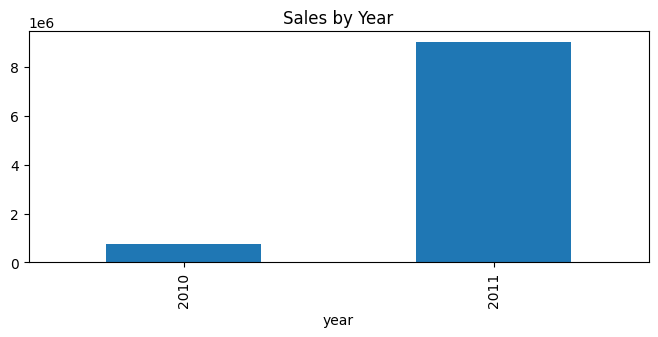

In [33]:
(sales
 .assign(total=sales.Quantity * sales.UnitPrice,
        year=sales.InvoiceDate.dt.year)
 .groupby('year')
 .sum(numeric_only=True)
 .total
 .plot.bar(title='Sales by Year', figsize=(8,3))
)

In [34]:
(sales_pl
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice"),
    year = pl.col("InvoiceDate").dt.year()
 )
 .select(pl.col(pl.Int64, pl.Float64, pl.Int32))
 .group_by("year")
 .sum()
 .select(pl.col("year", "total"))
 .plot.bar(x="year", y="total", title="Sales by Year")
)

:Bars   [year]   (total)

## Sales by Country

<Axes: title={'center': 'Sales by Year'}, xlabel='Country'>

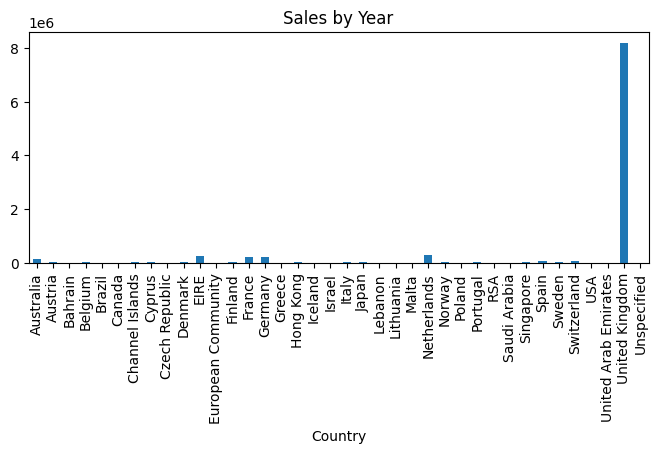

In [35]:
(sales
 .assign(total=sales.Quantity * sales.UnitPrice,
        year=sales.InvoiceDate.dt.year)
 .groupby('Country')
 .sum(numeric_only=True)
 .total
 .plot.bar(title='Sales by Year', figsize=(8,3))
)
 

In [36]:
(sales_pl
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice"),
    year = pl.col("InvoiceDate").dt.year()
 )
 .group_by("Country")
 .sum()
 .select(pl.col("Country", "total"))
 .plot.bar(x="Country",
           y="total",
           title="Sales by Year",
           width=1000,
           rot=90)
)

:Bars   [Country]   (total)

<Axes: title={'center': 'Sales by Year'}, xlabel='Country'>

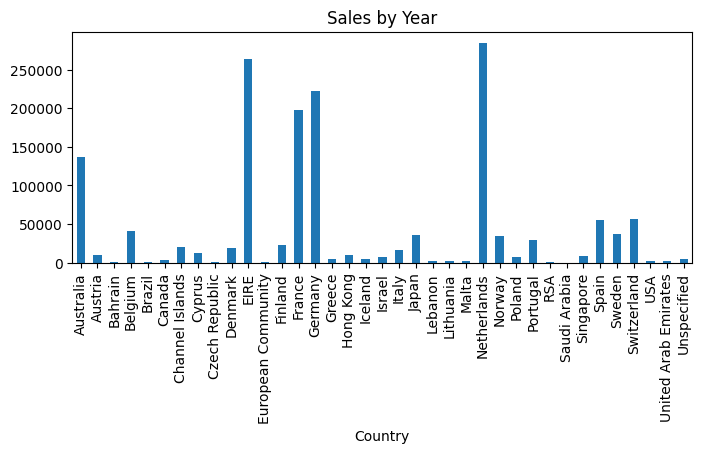

In [37]:
# Remove UK
(sales
 .query('Country != "United Kingdom"')
 .assign(total=sales.Quantity * sales.UnitPrice,
        year=sales.InvoiceDate.dt.year)
 .groupby('Country')
 .sum(numeric_only=True)
 .total
 .plot.bar(title='Sales by Year', figsize=(8,3))
)

In [38]:
(sales_pl
 .filter(pl.col("Country") != "United Kingdom")
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice"),
    year = pl.col("InvoiceDate").dt.year()
 )
 .group_by("Country")
 .sum()
 .select(pl.col("Country", "total"))
 .plot.bar(x="Country",
           y="total",
           title="Sales by Year",
           width=1000,
           rot=90)
)

:Bars   [Country]   (total)

<Axes: title={'center': 'Sales by Year'}, ylabel='Country'>

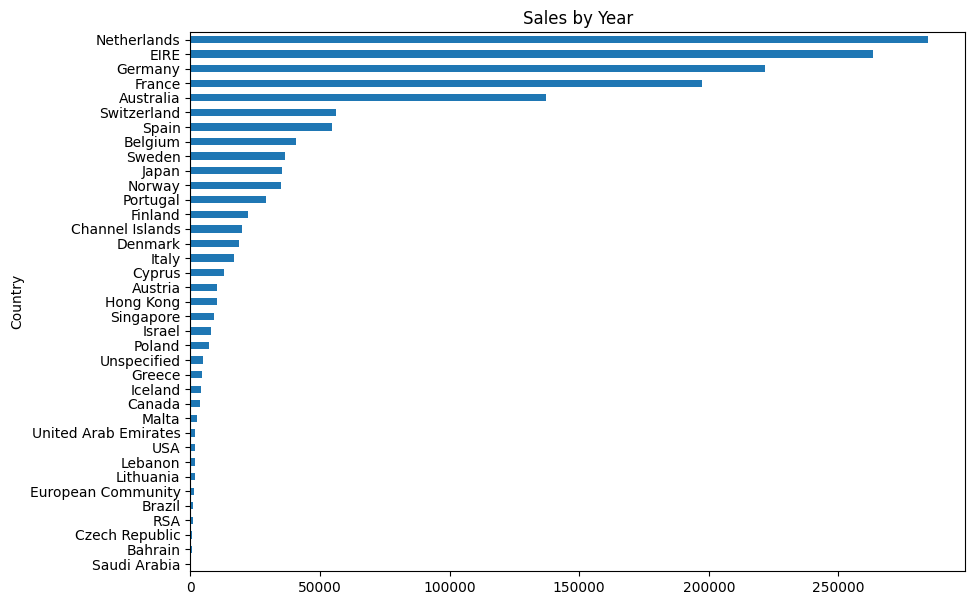

In [39]:
# sort and change to horizontal
(sales
 .query('Country != "United Kingdom"')
 .assign(total=sales.Quantity * sales.UnitPrice,
        year=sales.InvoiceDate.dt.year)
 .groupby('Country')
 .sum(numeric_only=True)
 .total
 .sort_values()
 .plot.barh(title='Sales by Year',figsize=(10,7))
)

In [40]:
(sales_pl
 .filter(pl.col("Country") != "United Kingdom")
 .with_columns(
    total = pl.col("Quantity") * pl.col("UnitPrice"),
    year = pl.col("InvoiceDate").dt.year()
 )
 .group_by("Country")
 .sum()
 .select(pl.col("Country", "total"))
 .sort("total", descending=False)
 .plot.barh(x="Country",
           y="total",
           title="Sales by Year",
           width=1000,
           height=700
           )
)

:Bars   [Country]   (total)

In [41]:
# Limit countries
(sales
 .Country
 .value_counts()
)

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [42]:
(sales_pl
 ["Country"]
 .value_counts(sort=True)
)

Country,count
str,u32
"""United Kingdom…",495478
"""Germany""",9495
"""France""",8557
"""EIRE""",8196
"""Spain""",2533
"""Netherlands""",2371
"""Belgium""",2069
"""Switzerland""",2002
"""Portugal""",1519


In [43]:
n = 10
top = (sales
 .Country
 .value_counts()
)

topn = top.index[:n]

(sales
 .assign(Country = sales.Country.where(sales.Country.isin(topn), 'Other'))
 .Country
 .value_counts()
)

Country
United Kingdom    495478
Germany             9495
France              8557
Other               8430
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64[pyarrow]

In [44]:
n = 10
top_pl = (sales_pl
          ["Country"]
          .value_counts(sort=True)
          )

topn_pl = top_pl[:n]

(sales_pl
 .with_columns(
     Country = pl.when(pl.col("Country").is_in(topn_pl["Country"]))
                .then(pl.col("Country"))
                .otherwise(pl.lit("Other"))
 )
 ["Country"]
 .value_counts(sort=True)
)

Country,count
str,u32
"""United Kingdom…",495478
"""Germany""",9495
"""France""",8557
"""Other""",8430
"""EIRE""",8196
"""Spain""",2533
"""Netherlands""",2371
"""Belgium""",2069
"""Switzerland""",2002


In [45]:
from helpers import limit_n

limit_n(sales, 'Country').value_counts()

Country
United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Other                2410
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Unspecified           446
Austria               401
Denmark               389
Japan                 358
Name: count, dtype: int64[pyarrow]

In [46]:
from helpers import limit_n_pl
limit_n_pl(sales_pl, "Country").value_counts()

Country,count
str,u32
"""Channel Island…",758
"""Italy""",803
"""Other""",2410
"""EIRE""",8196
"""Switzerland""",2002
"""Belgium""",2069
"""Finland""",695
"""France""",8557
"""Cyprus""",622


<Axes: title={'center': 'Sales by Year'}, ylabel='Country'>

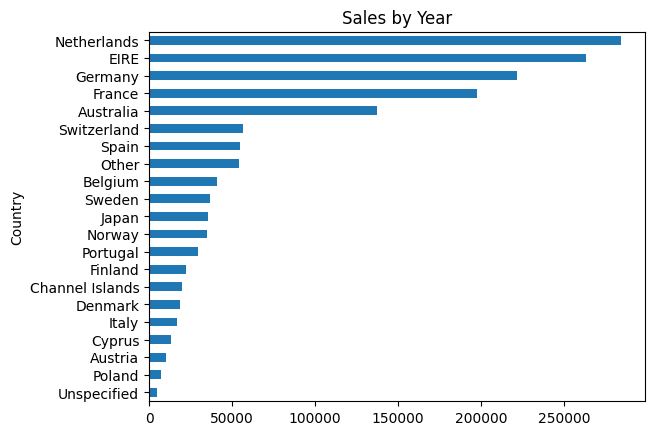

In [47]:
# Use the function to create/update a column
(sales
 .query('Country != "United Kingdom"')
 .assign(Country=lambda df: limit_n(df, 'Country'),
         total=lambda df: df.Quantity * df.UnitPrice,
         year=lambda df: df.InvoiceDate.dt.year)
 .groupby('Country')
 .sum(numeric_only=True)
 .total
 .sort_values()
 .plot.barh(title='Sales by Year')
)

In [48]:
# Use the function to create/update a column
(sales
 .query('Country != "United Kingdom"')
 .assign(Country=lambda df: limit_n(df, 'Country'),
         total=lambda df: df.Quantity * df.UnitPrice,
         year=lambda df: df.InvoiceDate.dt.year)
 .groupby('Country')
 .sum(numeric_only=True)
 .total
 .sort_values()
 #.plot.barh(title='Sales by Year')
)

Country
Unspecified          4749.79
Poland               7213.14
Austria             10154.32
Cyprus              12946.29
Italy               16890.51
Denmark             18768.14
Channel Islands     20086.29
Finland             22326.74
Portugal            29367.02
Norway              35163.46
Japan               35340.62
Sweden              36595.91
Belgium             40910.96
Other               54150.71
Spain               54774.58
Switzerland         56385.35
Australia          137077.27
France             197403.90
Germany            221698.21
EIRE               263276.82
Netherlands        284661.54
Name: total, dtype: double[pyarrow]

In [49]:
(sales_pl
 .with_columns(
     Country = limit_n_pl(sales_pl, "Country"),
     total = pl.col("Quantity") * pl.col("UnitPrice"),
     year = pl.col("InvoiceDate").dt.year()
 )
 .filter(pl.col("Country") != "United Kingdom")
 .group_by("Country")
 .sum()
 .select(pl.col("Country", "total"))
 .sort("total", descending=False)
)

Country,total
str,f64
"""Unspecified""",4749.79
"""Austria""",10154.32
"""Cyprus""",12946.29
"""Italy""",16890.51
"""Denmark""",18768.14
"""Channel Island…",20086.29
"""Finland""",22326.74
"""Portugal""",29367.02
"""Norway""",35163.46


In [50]:
(sales_pl
 .with_columns(
     Country = limit_n_pl(sales_pl, "Country"),
     total = pl.col("Quantity") * pl.col("UnitPrice"),
     year = pl.col("InvoiceDate").dt.year()
 )
 .filter(pl.col("Country") != "United Kingdom")
 .group_by("Country")
 .sum()
 .select(pl.col("Country", "total"))
 .sort("total", descending=False)
 .plot.barh(x="Country",
           y="total",
           title="Sales by Year",
           height=500
           )
)

:Bars   [Country]   (total)

## Sales by Month

In [51]:
# This code throws an error
# (sales
#  .assign(total=lambda df: df.Quantity * df.UnitPrice)
#  .groupby(pd.Grouper(key='InvoiceDate', freq='M'))
#  .sum(numeric_only=True)
# )

In [52]:
sales.dtypes

InvoiceNo             string[pyarrow]
StockCode             string[pyarrow]
Description           string[pyarrow]
Quantity               int64[pyarrow]
InvoiceDate    timestamp[us][pyarrow]
UnitPrice             double[pyarrow]
CustomerID             int64[pyarrow]
Country               string[pyarrow]
dtype: object

In [53]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})
 #.dtypes
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby(pd.Grouper(key='InvoiceDate', freq='M'))
 .sum(numeric_only=True)
)

,Quantity,UnitPrice,CustomerID,total
InvoiceDate,,,,
2010-12-31,342228,260520.850,416697748,748957.020
2011-01-31,308966,172752.800,331919771,560000.260
2011-02-28,277989,127448.770,311780860,498062.650
2011-03-31,351872,171486.510,422329758,683267.080
2011-04-30,289098,129164.961,354119428,493207.121
2011-05-31,380391,190685.460,440008786,723333.510
2011-06-30,341623,200717.340,426470991,691123.120
2011-07-31,391116,171906.791,420922578,681300.111
2011-08-31,406199,150385.680,421947808,682680.510


In [88]:
(sales_pl
 .with_columns(
     total = pl.col("Quantity") * pl.col("UnitPrice")
 )
 .group_by([
     pl.col("InvoiceDate").dt.year().alias("year"),
     pl.col("InvoiceDate").dt.month().alias("month")
     ],
     maintain_order=True)
 .sum()
 .select(pl.col(pl.Int32), pl.col(pl.Int8), pl.col(pl.Int64), pl.col(pl.Float64))
)

year,month,Quantity,CustomerID,UnitPrice,total
i32,i8,i64,i64,f64,f64
2010,12,342228,416697748,260520.85,748957.02
2011,1,308966,331919771,172752.8,560000.26
2011,2,277989,311780860,127448.77,498062.65
2011,3,351872,422329758,171486.51,683267.08
2011,4,289098,354119428,129164.961,493207.121
2011,5,380391,440008786,190685.46,723333.51
2011,6,341623,426470991,200717.34,691123.12
2011,7,391116,420922578,171906.791,681300.111
2011,8,406199,421947808,150385.68,682680.51


In [89]:
# Check whether old format uses more memory
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})
 .memory_usage(deep=True)
)

Index               132
InvoiceNo       5428381
StockCode       4924243
Description    16635171
Quantity        4335272
InvoiceDate     4335272
UnitPrice       4335272
CustomerID      4403011
Country         9416321
dtype: int64

In [90]:
(sales
 .memory_usage(deep=True)
)

Index               132
InvoiceNo       5428381
StockCode       4924243
Description    16635171
Quantity        4335272
InvoiceDate     4335272
UnitPrice       4335272
CustomerID      4403011
Country         9416321
dtype: int64

<Axes: xlabel='InvoiceDate'>

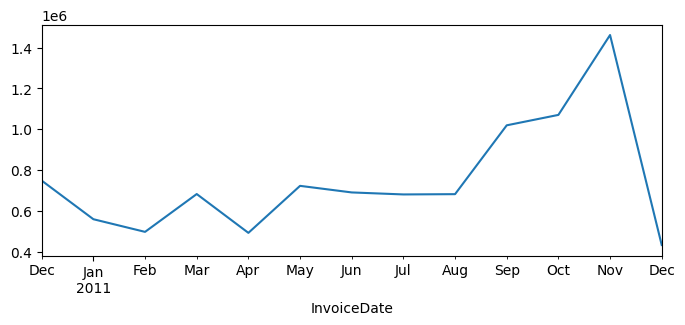

In [91]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'}) 
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby(pd.Grouper(key='InvoiceDate', freq='M'))
 .sum(numeric_only=True)
 .total
 .plot(figsize=(8,3))
)

In [105]:
(
    sales_pl.with_columns(total=pl.col("Quantity") * pl.col("UnitPrice"))
    .group_by(
        [
            pl.col("InvoiceDate").dt.year().alias("year"),
            pl.col("InvoiceDate").dt.month().alias("month"),
        ],
        maintain_order=True,
    )
    .sum()
    .with_columns(
        date = pl.col("year").cast(str) + "-" + pl.col("month").cast(str)
    )
    .select("date", "total")
    .plot(x="date", y="total")
)

:Curve   [date]   (total)

<Axes: xlabel='InvoiceDate'>

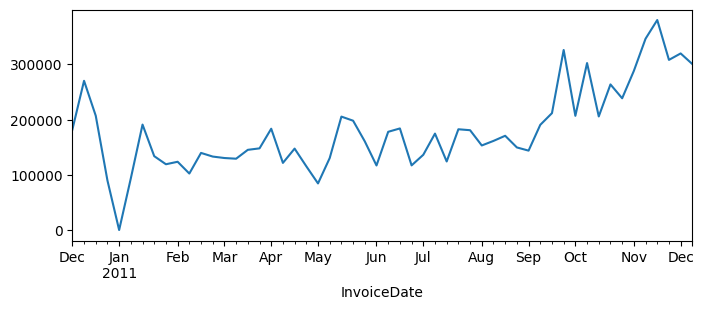

In [106]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby(pd.Grouper(key='InvoiceDate', freq='w'))
 .sum(numeric_only=True)
 .total
 .plot(figsize=(8,3))
)
 

<Axes: xlabel='InvoiceDate'>

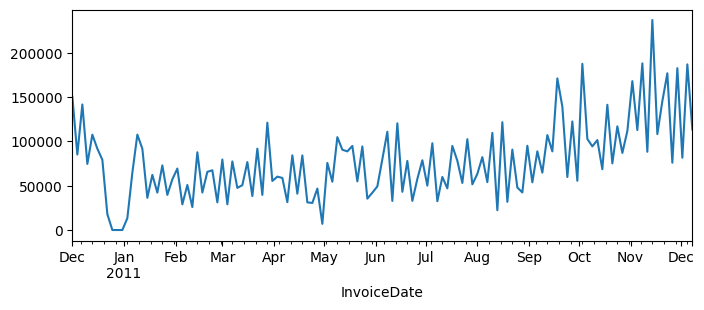

In [107]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'}) 
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby(pd.Grouper(key='InvoiceDate', freq='3d'))
 .sum(numeric_only=True)
 .total
 .plot(figsize=(8,3))
)
 

## Sales by Month by Top N Countries

In [108]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'}) 
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='d'),
           'Country'])
 .sum(numeric_only=True)
 .total
)

InvoiceDate  Country       
2010-12-01   Australia           358.25
             EIRE                555.38
             France              855.86
             Germany             139.18
             Netherlands         192.60
                                 ...   
2011-12-09   Belgium             208.64
             France              249.45
             Germany            1689.72
             Norway             2638.69
             United Kingdom    27345.03
Name: total, Length: 1716, dtype: double[pyarrow]

In [109]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})  
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='d'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
)

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01,358.25,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,54615.15,<NA>
2010-12-02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,46053.93,<NA>
2010-12-03,<NA>,<NA>,<NA>,346.1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,620.0,<NA>,303.4,<NA>,<NA>,39985.44,<NA>
2010-12-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,25462.20,<NA>
2010-12-06,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,52402.84,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,198.4,<NA>,<NA>,168.9,...,<NA>,<NA>,<NA>,<NA>,0.0,<NA>,615.28,<NA>,54715.25,<NA>
2011-12-06,<NA>,<NA>,<NA>,898.77,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,172.06,<NA>,<NA>,<NA>,<NA>,50307.31,<NA>
2011-12-07,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,99.37,<NA>,<NA>,<NA>,<NA>,55028.58,<NA>


In [110]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})  
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='d'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
 .fillna(0)
)

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01,358.25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,54615.15,0.0
2010-12-02,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,46053.93,0.0
2010-12-03,0.00,0.0,0.0,346.10,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,620.00,0.0,303.4,0.00,0.0,39985.44,0.0
2010-12-05,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,25462.20,0.0
2010-12-06,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,52402.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.00,0.0,0.0,0.00,0.0,0.0,198.40,0.0,0.0,168.9,...,0.0,0.0,0.0,0.00,0.0,0.0,615.28,0.0,54715.25,0.0
2011-12-06,0.00,0.0,0.0,898.77,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,172.06,0.0,0.0,0.00,0.0,50307.31,0.0
2011-12-07,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,99.37,0.0,0.0,0.00,0.0,55028.58,0.0


<Axes: xlabel='InvoiceDate'>

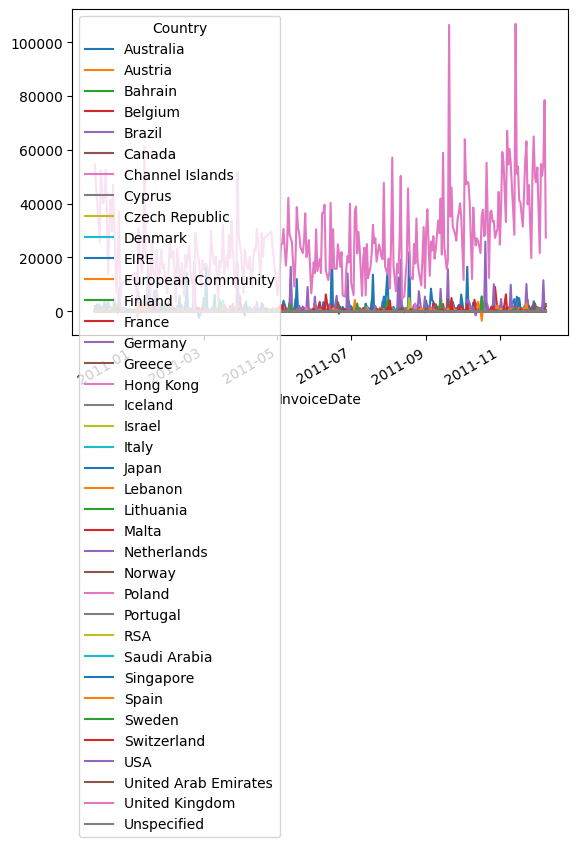

In [62]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})  
 .assign(total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='d'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
 .fillna(0)
 .plot()
)

<Axes: xlabel='InvoiceDate'>

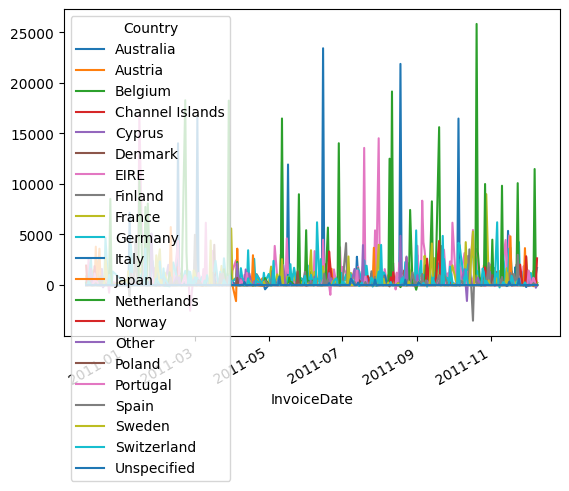

In [111]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})  
 .query('Country != "United Kingdom"')
 .assign(Country=lambda df: limit_n(df, 'Country'),
         total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='d'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
 .fillna(0)
 .plot()
)
 

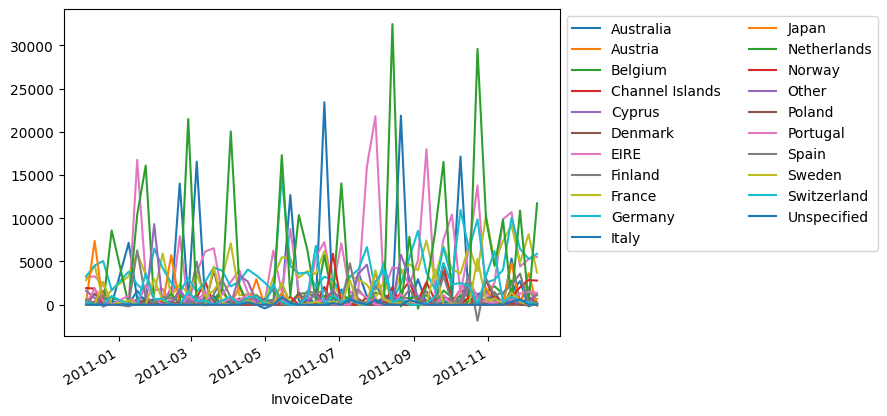

In [112]:
(sales
 .astype({'InvoiceDate':'datetime64[ns]'})  
 .query('Country != "United Kingdom"')
 .assign(Country=lambda df: limit_n(df, 'Country'),
         total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='w'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
 .fillna(0)
 .plot()
 .legend(bbox_to_anchor=(1,1), ncols=2)
)

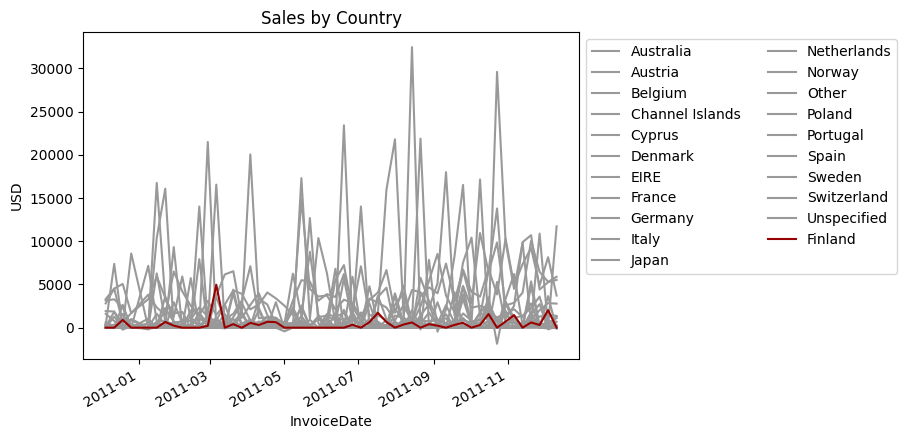

In [113]:
colors = []
def set_colors(df, country, normal='#999999', hl='#990000'):
  cols = []
  for col in df.columns:
    if col != country:
      colors.append(normal)
      cols.append(col)
  colors.append(hl)
  cols.append(country)
  return df.loc[:,cols]

def plot(df):
  ax = df.plot(color=colors, title='Sales by Country')
  ax.legend(bbox_to_anchor=(1,1), ncols=2)
  ax.set_ylabel('USD')
  return df

final = (sales
 .astype({'InvoiceDate':'datetime64[ns]'})   
 .query('Country != "United Kingdom"')
 .assign(Country=lambda df: limit_n(df, 'Country'),
         total=lambda df: df.Quantity * df.UnitPrice)
 .groupby([pd.Grouper(key='InvoiceDate', freq='w'),
           'Country'])
 .sum(numeric_only=True)
 .total
 .unstack()
 .fillna(0)
 .pipe(set_colors, country='Finland')
 .pipe(plot)
)
